In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 245s 4ms/step - loss: 0.2464 - acc: 0.9241 - val_loss: 0.0481 - val_acc: 0.9838
Epoch 2/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0815 - acc: 0.9752 - val_loss: 0.0378 - val_acc: 0.9881
Epoch 3/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0611 - acc: 0.9820 - val_loss: 0.0273 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0490 - acc: 0.9851 - val_loss: 0.0236 - val_acc: 0.9921
Epoch 5/12
60000/60000 [=

In [0]:

import time


# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    import IPython
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    

Test score: 0.021597764268203038
Test accuracy: 0.993


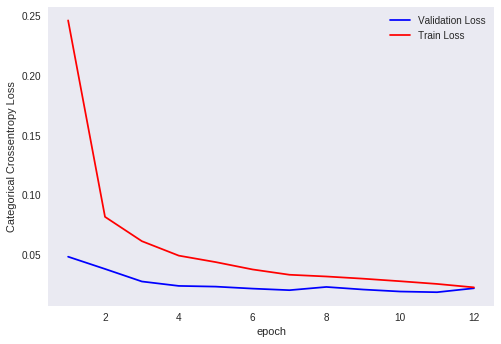

In [0]:
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [6]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (7,7), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 313s 5ms/step - loss: 0.2025 - acc: 0.9369 - val_loss: 0.0423 - val_acc: 0.9865
Epoch 2/10
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0611 - acc: 0.9814 - val_loss: 0.0300 - val_acc: 0.9903
Epoch 3/10
60000/60000 [==============================] - 314s 5ms/step - loss: 0.0449 - acc: 0.9856 - val_loss: 0.0279 - val_acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0349 - acc: 0.9895 - val_loss: 0.0258 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 314s 5ms/step - loss: 0.0286 - acc: 0.9909 - val_loss: 0.0272 - val_acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 313s 5ms/step - loss: 0.0264 - acc: 0.9917 - val_loss: 0.0232 - val_acc: 0.9926
Epoch 7/10
60000/60000 [=========================

Test score: 0.02412463044149199
Test accuracy: 0.9933


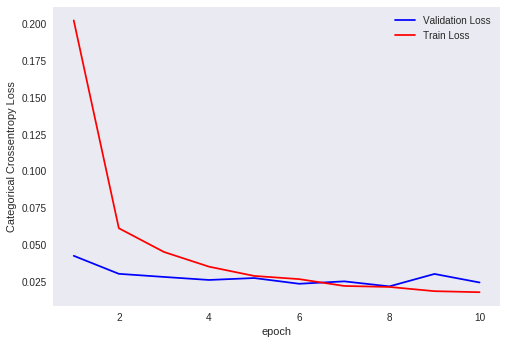

In [10]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [11]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 360s 6ms/step - loss: 0.2300 - acc: 0.9307 - val_loss: 0.0524 - val_acc: 0.9837
Epoch 2/12
60000/60000 [==============================] - 360s 6ms/step - loss: 0.0795 - acc: 0.9764 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 362s 6ms/step - loss: 0.0598 - acc: 0.9818 - val_loss: 0.0286 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 367s 6ms/step - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0232 - val_acc: 0.9926
Epoch 5/12
60000/60000 [==============================] - 376s 6ms/step - loss: 0.0443 - acc: 0.9865 - val_loss: 0.0265 - val_acc: 0.9918
Epoch 6/12
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0386 - acc: 0.9882 - val_loss: 0.0214 - val_acc: 0.9937
Epoch 7/12
60000/60000 [=========================

Test score: 0.022735029783016444
Test accuracy: 0.9931


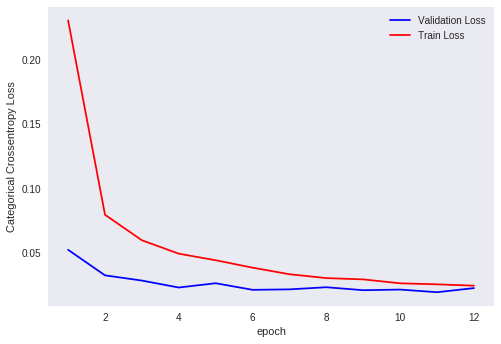

In [12]:

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# ***CONCLUSION***

In [5]:
# CONCLUSION

# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Conv2D_input","Conv2D" ,"pool_size","dropout","dropout_output", "Test Accuracy","Test score"]

x.add_row([(32,5,5), (64,5,5), (3,3), .5,  .25 ,.993,.0215])
x.add_row([(32,7,7), (64,7,7), (3,3), .25, .25  ,.9933,.0241])
x.add_row([(32,3,3), (64,6,6), (2,2), .5,  .5 ,.9931,.0227])


print(x)

+--------------+------------+-----------+---------+----------------+---------------+------------+
| Conv2D_input |   Conv2D   | pool_size | dropout | dropout_output | Test Accuracy | Test score |
+--------------+------------+-----------+---------+----------------+---------------+------------+
|  (32, 5, 5)  | (64, 5, 5) |   (3, 3)  |   0.5   |      0.25      |     0.993     |   0.0215   |
|  (32, 7, 7)  | (64, 7, 7) |   (3, 3)  |   0.25  |      0.25      |     0.9933    |   0.0241   |
|  (32, 3, 3)  | (64, 6, 6) |   (2, 2)  |   0.5   |      0.5       |     0.9931    |   0.0227   |
+--------------+------------+-----------+---------+----------------+---------------+------------+



1.   I have used 3 architecture to observe the model. I have used adam as optimizer and relu as activation on my model and after the analysis of model with different dropout-rates,pool size and kernal size the model gave excellent result in the accuracy and gave mimimum error but this model had no significant changes with different values after analysis. From my observation i can conclude that  keeping minimal dropout rates such that the model does not gets overfit, the model is going to be as required



